# Feature Engineering

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. (wikipedia)

In [2]:
from modules.utils import get_data,is_day_off
df = get_data()

In [3]:
df.sample(20)

,Date,Conso,Temp
20236,2014-02-26 13:30:00,10436.0,282.915000
82646,2017-09-18 18:30:00,8714.0,285.505000
69549,2016-12-19 22:00:00,11302.0,277.150000
22294,2014-04-10 10:30:00,9021.0,288.895000
70330,2017-01-05 04:30:00,10032.0,273.810000
41263,2015-05-10 15:00:00,6054.0,293.572500
16263,2013-12-05 19:00:00,12505.0,280.660000
24020,2014-05-16 09:30:00,8549.0,288.145000
47133,2015-09-09 22:00:00,6662.0,288.270000
23900,2014-05-13 21:30:00,8344.0,282.240000


## Currently what is $X$ and what is $Y$ ?

## Workshop : find some new features (15min)
Only use available data: 
- Consumption for each day
- Temperature for each day
- is_day_off function

# New feature : is_day_off

In [4]:
def compute_day_off(date):
    if is_day_off(date):
        return 1
    return 0

df['is_day_off'] = df['Date'].apply(compute_day_off)

In [5]:
df.head()

,Date,Conso,Temp,is_day_off
1,2013-01-01 00:00:00,8822.0,278.91,1
2,2013-01-01 00:30:00,8499.0,278.91,1
3,2013-01-01 01:00:00,8229.0,278.91,1
4,2013-01-01 01:30:00,8150.0,278.91,1
5,2013-01-01 02:00:00,7848.0,278.91,1


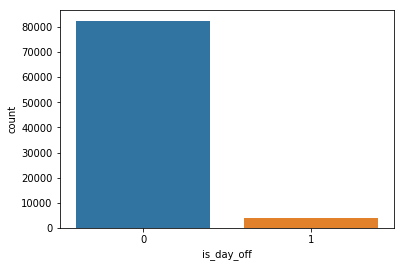

In [6]:
import seaborn as sns
%matplotlib inline

sns.countplot(df['is_day_off'])

## New feature : conso_24h_lag
Since we have all half hours per day, we can safely make a shift of the dataset to get the 24h consumption lag !  
We can also use 24 lag values since we are only predicting for the next day  
Thanks to cleaning step 

In [7]:
df['conso_24_lag'] = df['Conso'].shift(48)

In [8]:
df.tail()

,Date,Conso,Temp,is_day_off,conso_24_lag
86429,2017-12-06 14:00:00,11880.0,279.151265,0,11665.0
86430,2017-12-06 14:30:00,11710.0,279.151265,0,11506.0
86431,2017-12-06 15:00:00,11737.0,279.151265,0,11463.0
86432,2017-12-06 15:30:00,11713.0,279.151265,0,11591.0
86433,2017-12-06 16:00:00,11870.0,279.151265,0,11773.0


In [18]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter( x=df[:200]['Date'], y=(df[:200]['Conso'])),go.Scatter( x=df[:200]['Date'], y=(df[:200]['conso_24_lag']))]
py.plot(data)

'file:///Users/lucasberbesson/codeproject/datascience/ds2/temp-plot.html'

## New feature : conso_7_days_lag

In [11]:
df['conso_7_days_lag'] = df['Conso'].shift(336)

In [12]:
df.sample(10)

,Date,Conso,Temp,is_day_off,conso_24_lag,conso_7_days_lag
46376,2015-08-25 03:30:00,4985.0,284.455000,0,4638.0,4604.0
76006,2017-05-03 10:30:00,9668.0,283.650000,0,8824.0,9694.0
63746,2016-08-21 00:30:00,4482.0,288.855000,0,4539.0,4453.0
11683,2013-09-01 09:00:00,6058.0,287.224000,0,6556.0,5627.0
19070,2014-02-02 06:30:00,8781.0,274.840000,0,8965.0,8463.0
32679,2014-11-12 19:00:00,10636.0,282.182333,0,9520.0,10711.0
12372,2013-09-15 17:30:00,7102.0,289.525000,0,7402.0,6393.0
65414,2016-09-24 18:30:00,7006.0,292.370000,0,7752.0,7063.0
77654,2017-06-06 18:30:00,7315.0,288.250000,0,6803.0,7481.0
35412,2015-01-08 17:30:00,12463.0,281.748167,0,13625.0,11017.0


# New feature : is_weekend

In [13]:
from datetime import datetime

def is_weekend(date):
    if date.weekday() >=5:
        return 1
    return 0

df['is_weekend'] = df['Date'].apply(is_weekend)

In [14]:
df.sample(10)

,Date,Conso,Temp,is_day_off,conso_24_lag,conso_7_days_lag,is_weekend
38362,2015-03-11 04:30:00,7941.0,279.402500,0,7511.0,9081.0,0
45272,2015-08-02 03:30:00,4325.0,284.750000,0,4572.0,4529.0,1
70034,2016-12-30 00:30:00,10155.0,270.390000,0,9424.0,8849.0,0
49356,2015-10-26 05:30:00,7535.0,281.853583,0,6078.0,9545.0,0
80735,2017-08-09 23:00:00,5016.0,285.430000,0,4936.0,5286.0,0
1970,2013-02-11 00:30:00,10133.0,273.150000,0,10474.0,9476.0,0
11655,2013-08-31 19:00:00,6585.0,293.536000,0,6991.0,5900.0,1
31430,2014-10-17 18:30:00,8532.0,289.065583,0,8876.0,8424.0,0
17937,2014-01-09 16:00:00,10702.0,283.040000,0,10095.0,10168.0,0
50169,2015-11-12 04:00:00,5920.0,285.568015,0,5950.0,6008.0,0


# New feature : day_of_week

In [23]:
df['day_of_week']=df['Date'].dt.weekday

In [24]:
df.sample(5)

,Date,Conso,Temp,is_day_off,conso_24_lag,conso_7_days_lag,is_weekend,day_of_week
40164,2015-04-17 17:30:00,7876.0,288.4155,0,8164.0,7973.0,0,4
80972,2017-08-14 21:30:00,5826.0,293.7150,0,5726.0,5989.0,0,0
40848,2015-05-01 23:30:00,6765.0,281.2545,1,6753.0,5749.0,0,4
54763,2016-02-15 21:00:00,11144.0,274.4700,0,10226.0,9869.0,0,0
9057,2013-07-08 16:00:00,7923.0,301.4900,0,6090.0,7757.0,0,0


# Automate everyting

In [20]:
def compute_day_off(date):
    if is_day_off(date):
        return 1
    return 0


def is_weekend(date):
    if date.weekday() >=5:
        return 1
    return 0


def get_data_with_features(consumption_csv="./data/eco2mix_regional_cons_def.csv",weather_csv="./data/meteo-paris.csv"):
    """
    A function to get consumption and weather data
    Do the wrangling
    Add interesting features
    
    """
    df = get_data(consumption_csv,weather_csv)
    df['is_day_off'] = df['Date'].apply(compute_day_off)
    df['conso_24_lag'] = df['Conso'].shift(48)
    df['conso_7_days_lag'] = df['Conso'].shift(336)
    df['is_weekend'] = df['Date'].apply(is_weekend)
    df['day_of_week']=df['Date'].dt.weekday
    df.set_index("Date",inplace=True)
    return df.dropna()